In [ ]:
##1 loading data and librires 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [13]:
#read data 
import os
import pandas as pd

file_path = "C:\\Users\\FORMAT\\Videos\\New folder\\Coffee Shop Sales.xlsx"

if os.path.exists(file_path):
    data = pd.read_excel(file_path)
    print(data.head())
else:
    print(f"File not found: {file_path}")



   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [14]:
#see top 5 rows 
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [15]:
#see number of rows and colums
data.shape

(149116, 11)

In [32]:
#cheaking missing value 
data.isin(data).sum()

transaction_id      149116
transaction_date    149116
transaction_time    149116
transaction_qty     149116
store_id            149116
store_location      149116
product_id          149116
unit_price          149116
product_category    149116
product_type        149116
product_detail      149116
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [18]:
data.duplicated().any()


np.False_

In [19]:
data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [20]:
data.describe(include=object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [21]:
data.sample()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
139640,139977,2023-06-22,15:33:33,2,8,Hell's Kitchen,30,3.0,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg


In [22]:
def count_plot(x_axis=None,y_axis=None,Hue=None,top=None): 
    if x_axis:
        order=data[x_axis].value_counts()[:top].index
    else:
        order=data[y_axis].value_counts()[:top].index
    grafh=sns.countplot(x=x_axis,y=y_axis,data=data,hue=Hue,order=order)
    for value in grafh.containers:
        grafh.bar_label(value)
        plt.show()
   


In [23]:
def box_plot(x_axis=None,y_axis=None):
    sns.boxplot(x=x_axis,y=y_axis,data=data)
    if x_axis:
        plt.ylabel(x_axis)
        plt.xlabel("distribution")
    else:
        plt.xlabel(y_axis)
        plt.ylabel("distribution")



    plt.show()

In [35]:
def pie_plot(column_name,explodindex=None):
    label=data[column_name].value_counts().index
    frq=data[column_name].value_counts()
    explodelist=[0]*data[column_name].nunique()
    if explodindex is  not  None:
      explodelist[explodindex]=0.1
    
    plt.pie(frq,labels=label,autopct="%1.1f%%",shadow=True,explode=explodelist)
    plt.show()


In [28]:
#discover transaction_qty coulmc
data["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [29]:
data["product_category"].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

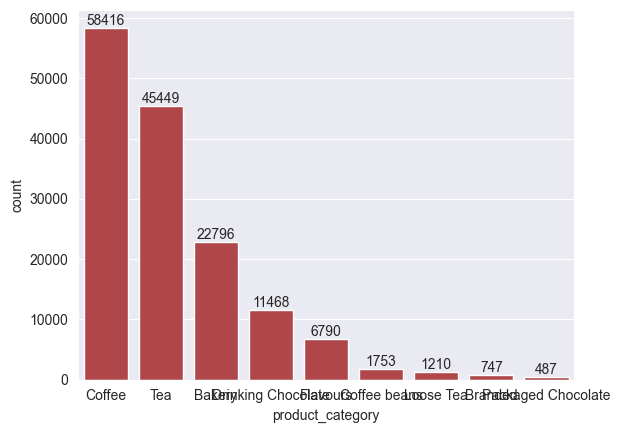

In [31]:
count_plot(x_axis="product_category")

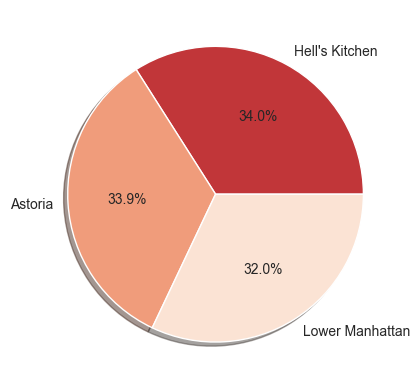

In [36]:
pie_plot(column_name="store_location")

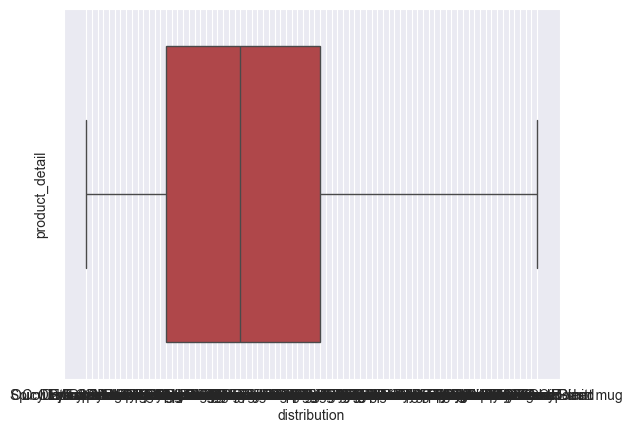

In [38]:
box_plot("product_detail")

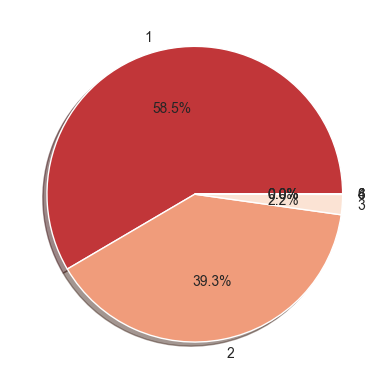

In [39]:
pie_plot(column_name="transaction_qty")

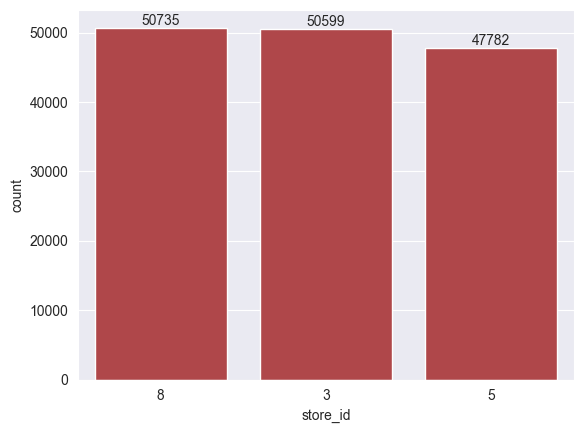

In [40]:
count_plot(x_axis="store_id")

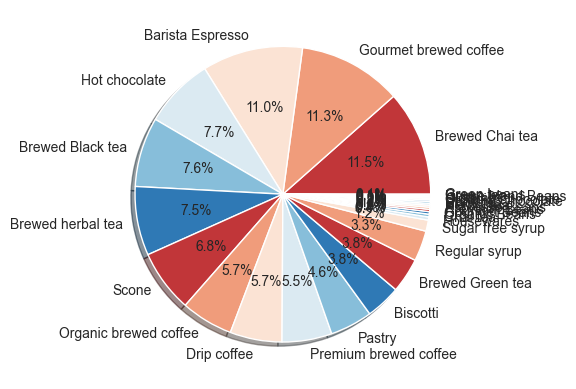

In [46]:
pie_plot(column_name="product_type")

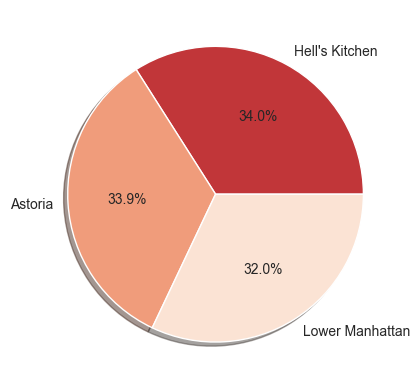

In [53]:
pie_plot(column_name="store_location")

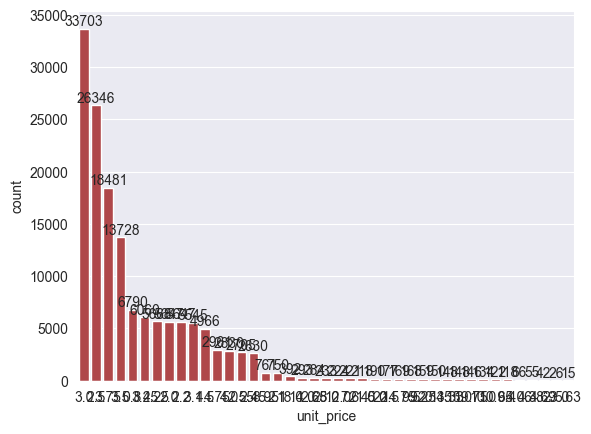

In [52]:
count_plot(x_axis="unit_price")

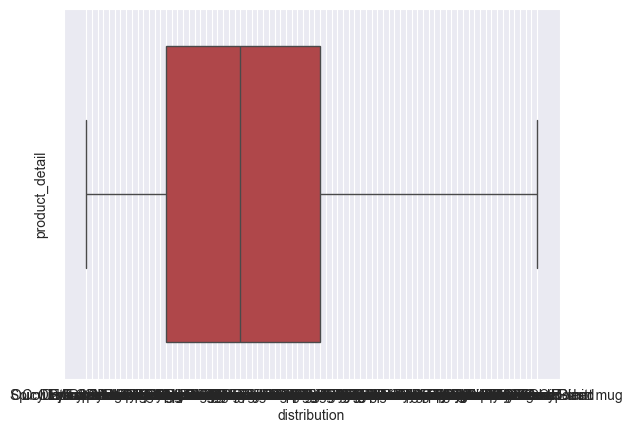

In [49]:
box_plot("product_detail")